**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab17-TH](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab17/Lab17-TH.ipynb)

___

# <font color=darkgreen>Exercise Set 17: Descriptive Statistics </font>
**Medrano, Giovanni**

**R11521018**

ENGR 1330 ES-17 - Homework

<hr>

Exercise 0:  Profile your computer


In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-6HAS1BN
desktop-6has1bn\medra
C:\Users\medra\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


In [14]:
# Let's import the necessary libraries:
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt 

<hr>

### Exercise1: 

1. Read the "Lubbock_Oct_T&P.csv" file as a dataframe and check its first few rows.<br>
2. Use descriptive functions of the Pandas library and explain the format of the dataframe<br>
3. Compute the arithmetic, harmonic, and geometric mean of 'temperature'.<br>
4. Find the median of 'precipitation' and 'temperature'.<br>
5. Report whether set of 'temperature' has one mode, two modes, or multiple modes.<br>
6. Find the range and IQR of 'precipitation'.<br>
7. Find the 10th,40th, and 70th percentile of 'temperature'.<br>
8. Provide a 5-number summary of 'precipitation'. Plot a box plot without outliers. Interpret it in your own words<br>
9. Find the variance and standard deviation of 'precipitation'.<br>
10. Find the skewness and kurtosis 'precipitation'.<br>

In [15]:
######### CODE TO AUTOMATICALLY DOWNLOAD THE DATABASE ################
#! pip install requests #install packages into local environment
import requests # import needed modules to interact with the internet
# make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'http://54.243.252.9/engr-1330-webroot/4-Databases/Lubbock_Oct_T&P.csv' # a csv file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('Lubbock_Oct_T&P.csv', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

**If you get an error, or an empty file, then download using your browser and mouse.**

In [16]:
#code here
# read the data into a dataframe
df=pd.read_csv('Lubbock_Oct_T&P.csv')
df.head()

,Date,precipitation,temperature
0,1895-10,2.14,57.3
1,1896-10,3.33,58.7
2,1897-10,1.13,60.4
3,1898-10,0.26,61.0
4,1899-10,0.76,62.9


In [17]:
# info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           125 non-null    object 
 1   precipitation  125 non-null    float64
 2   temperature    125 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


---

In [18]:
# info about the dataframe
df.describe()

,precipitation,temperature
count,125.000000,125.000000
mean,1.823280,61.411200
std,1.722971,2.343805
min,0.000000,54.200000
25%,0.550000,59.900000
50%,1.200000,61.600000
75%,2.440000,62.900000
max,7.220000,66.900000


In [26]:
# descriptive statistics for temperature
tMean = df['temperature'].mean()
hMean = statistics.harmonic_mean(df['temperature'])
gMean = statistics.geometric_mean(df['temperature'])

print('The temperature has an Arithmetic mean of', tMean)
print('The temperature has an Harmonic mean of', hMean)
print('The temperature has an Geometric mean of', gMean)

The temperature has an Arithmetic mean of 61.41119999999999
The temperature has an Harmonic mean of 61.32108490088802
The temperature has an Geometric mean of 61.36638193715268


In [29]:
# median of precipitation and temperature
medT = df['temperature'].median()
medP = df['precipitation'].median()

print('The median temperature is thus:', medT)
print('The median precipitation is thus:', medP)

The median temperature is thus: 61.6
The median precipitation is thus: 1.2


In [32]:
# how many modes temperature
modes = df['temperature']
#using stats
mode6 = statistics.mode(modes)
print(mode6) 
# via pandas:
mode7 = modes.mode()
print(mode7) 


61.6
0    61.6
dtype: float64


In [33]:
# IQR precipitation
iqrr = df['precipitation']
#via Numpy:
IQR1 = np.percentile(iqrr, 75) -np.percentile(iqrr, 25)    #returns the IQR = Q3-Q1 = P75-P25
print("The IQR of the budget of the Top10 highest-grossing films is ",IQR1)
#via scipy.stats:
IQR2 = scipy.stats.iqr(iqrr)    #returns the IQR- Can be used for other percentile differences as well >> iqr(object, rng=(p1, p2))
print("The IQR of the budget of the Top10 highest-grossing films is ",IQR2)


The IQR of the budget of the Top10 highest-grossing films is  1.89
The IQR of the budget of the Top10 highest-grossing films is  1.89


In [36]:
# Selected quantiles for temperature
quants = df['temperature']

#via Numpy:
p10 = np.percentile(quants, 10) #returns the 10th percentile
print("The 10th percentile of the temperature is",p10)
p4070 = np.percentile(quants, [40,70]) #returns the 40th and 70th percentile
print("The 40th and 70th percentile of the temperature is",p4070)


#via Pandas:
p10n = quants.quantile(0.10) #returns the 10th percentile - notice the difference from Numpy
print("The 10th percentile of the temperature",p10n)


#via Statistics:
Qs = statistics.quantiles(quants, n=4, method='inclusive')     #The parameter n defines the number of resulting equal-probability percentiles: 
                                                               #n=4 returns the quartiles | n=2 returns the median
print("The quartiles of the budget of the temperature is",Qs)

The 10th percentile of the temperature is 58.58
The 40th and 70th percentile of the temperature is [61.   62.68]
The 10th percentile of the temperature 58.58
The quartiles of the budget of the temperature is [59.9, 61.6, 62.9]


In [37]:
# 5-number summary precipitation
summary = df['precipitation']
summary.describe()

count    125.000000
mean       1.823280
std        1.722971
min        0.000000
25%        0.550000
50%        1.200000
75%        2.440000
max        7.220000
Name: precipitation, dtype: float64

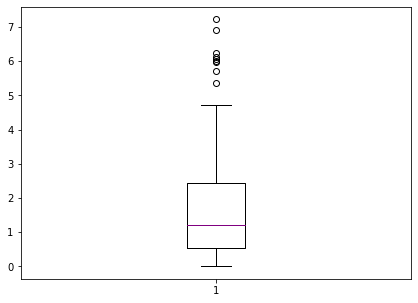

In [40]:
# Boxplot
import matplotlib.pyplot as plt 
info = df['precipitation']
fig = plt.figure(figsize =(7, 5))
plt.boxplot(info,medianprops={'linewidth': 1, 'color': 'purple'})

plt.show()


In [42]:
# Variance and standard deviation of 'precipitation'
info = df['precipitation']
var = statistics.variance(info)
sd = statistics.stdev(info)
print('The vairance of precipitation is:', var)
print('The standard deviation of precipitation is:', sd)

The vairance of precipitation is: 2.9686302838709677
The standard deviation of precipitation is: 1.7229713531776922


In [44]:
# Skewness and kurtosis 'precipitation'
info = df['precipitation']
skew = scipy.stats.skew(info)
kurtosis = scipy.stats.kurtosis(info)
print('The skew of precipitation is:', skew)
print('The kurtosis of precipitation is:', kurtosis)

The skew of precipitation is: 1.3136899131063302
The kurtosis of precipitation is: 0.9313333208069934
